In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import math
from sklearn.utils import shuffle

In [ ]:
def load_data():
    data_frame = pd.read_csv("training.csv")
    data_frame["Image"] = data_frame["Image"].apply(lambda x: np.fromstring(x, sep = ' '))
    data_frame.dropna(inplace = True)
    
    images_array = np.vstack(data_frame['Image'].values) / 255.0
    images_array = images_array.astype(np.float32)
    images_array = images_array.reshape(-1, 96, 96, 1)
    
    labels_array = data_frame[data_frame.columns[:-1]].values
    labels_array = (labels_array - 48) / 48
    labels_array = labels_array.astype(np.float32)
    
    images_array, labels_array = shuffle(images_array, labels_array, random_state = 42)
    
    
    return images_array, labels_array

In [ ]:
def plot_images(images_array, k):
    np.random.seed(42)
    
    random_indexes = np.random.permutation(len(images_array))[:k]
    random_images = images_array[random_indexes]
    length = math.sqrt(k)
    plt.figure(figsize=(10, 10))
    
    for i in range(k):
        plt.subplot(length, length, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(random_images[i].reshape(96,96))

In [ ]:
images_array, labels_array = load_data()

In [ ]:
images_array.shape

In [ ]:
images_array.shape[1:]

In [ ]:
plot_images(images_array, 16)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Activation, \
                                    Flatten, Dropout, BatchNormalization, Dense, AvgPool2D
from tensorflow.keras import Sequential

In [ ]:
keras.backend.clear_session()

In [ ]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding = "same", input_shape = images_array.shape[1:]),
    MaxPool2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3,  padding = "same"),
    MaxPool2D(pool_size=2),
    
    Conv2D(filters=64, kernel_size=3, padding = "same"),
    #MaxPool2D(pool_size=2),
    
    Conv2D(filters = 128, kernel_size=3, padding = "same"),
    #MaxPool2D(pool_size=2),
    
    Conv2D(filters = 256, kernel_size=3, padding = "same"),
    #MaxPool2D(pool_size=2),
    
    Conv2D(filters = 512, kernel_size=3, padding = "same"),
    #MaxPool2D(pool_size=2),
    
    Flatten(),
    
    Dense(512),
    Activation("relu"),
    #BatchNormalization(),
    
    Dense(256),
    Activation("relu"),
    #BatchNormalization(),
    
    Dense(128),
    Activation("relu"),
    #BatchNormalization(),
    
    Dense(64),
    Activation("relu"),
    #BatchNormalization(),
     
    Dense(30)
])

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(lr = 1e-4), 
              loss = keras.losses.mean_squared_error,
              metrics = ["mae", "mse", "accuracy"])

In [ ]:
import time

def get_run_name(dir_name, file_name):
    fName = "run-" + str(int(time.time()))

    return fName

In [ ]:
get_run_name("log_dir", "run")

In [ ]:
BATCH_SIZE = 64
EPOCHS = 200

history = model.fit(images_array, labels_array, 
                    batch_size = BATCH_SIZE, 
                    epochs = EPOCHS,
                    callbacks = [keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)],
                    validation_split = 0.2)

In [ ]:
# plt.plot(history.epoch, history.history["accuracy"], label = "Accuracy")
# plt.plot(history.epoch, history.history["val_accuracy"], label = "Val_accuracy")
# plt.grid(True)
# plt.title("ADAM LR = 1e-4, BN after Activation, MAX POOL")
# plt.savefig("Accuracy/1")

In [ ]:
# plt.plot(history.epoch, history.history["accuracy"], label = "Accuracy")
# plt.plot(history.epoch, history.history["val_accuracy"], label = "Val_accuracy")
# plt.grid(True)
# plt.title("ADAM LR = 1e-5, BN after Activation, MAX POOL")
# plt.savefig("Accuracy/2")

In [ ]:
# plt.plot(history.epoch, history.history["accuracy"], label = "Accuracy")
# plt.plot(history.epoch, history.history["val_accuracy"], label = "Val_accuracy")
# plt.grid(True)
# plt.title("ADAM LR = 1e-4, BN after Activation, MAX POOL")
# plt.savefig("Accuracy/3")

In [ ]:
# plt.plot(history.epoch, history.history["accuracy"], label = "Accuracy")
# plt.plot(history.epoch, history.history["val_accuracy"], label = "Val_accuracy")
# plt.grid(True)
# plt.title("ADAM LR = 1e-5, BN after Activation, MAX POOL")
# plt.savefig("Accuracy/3")

In [ ]:
# plt.plot(history.epoch, history.history["accuracy"], label = "Accuracy")
# plt.plot(history.epoch, history.history["val_accuracy"], label = "Val_accuracy")
# plt.grid(True)
# plt.title("ADAM LR = 1e-5, BN after Activation, MAX POOL, Shuffling Data")
# plt.savefig("Accuracy/4")

In [ ]:
# plt.plot(history.epoch, history.history["accuracy"], label = "Accuracy")
# plt.plot(history.epoch, history.history["val_accuracy"], label = "Val_accuracy")
# plt.grid(True)
# plt.title("SGD LR = 1e-4, BN after Activation, MAX POOL Everywhere, Shuffling Data, More Complex Model")
# plt.savefig("Accuracy/8")

In [ ]:
# plt.plot(history.epoch, history.history["mae"], label = "Mae")
# plt.plot(history.epoch, history.history["val_mae"], label = "Val_mae")
# plt.grid(True)
# plt.title("Adam, LR = 1e-4, BN after Activation, MAX POOL, Shuffling Data, MAE")
# plt.savefig("MAE_MSE/1")

In [ ]:
# plt.plot(history.epoch, history.history["mse"], label = "Mse")
# plt.plot(history.epoch, history.history["val_mse"], label = "Val_mse")
# plt.grid(True)
# plt.title("Adam, LR = 1e-4, BN after Activation, MAX POOL, Shuffling Data, MSE")
# plt.savefig("MAE_MSE/2")

In [ ]:
plt.plot(history.epoch, history.history["mse"], label = "Mse")
plt.plot(history.epoch, history.history["val_mse"], label = "Val_mse")
plt.grid(True)
plt.title("O: Adam(1e-4), BN_A_N, MAX_POOL, MSE")
plt.savefig("MAE_MSE/3")

In [ ]:
plt.plot(history.epoch, history.history["mae"], label = "Mae")
plt.plot(history.epoch, history.history["val_mae"], label = "Val_mae")
plt.grid(True)
plt.title("O: Adam(1e-4), BN_A_N, MAX_POOL, MSE")
plt.savefig("MAE_MSE/4")

In [ ]:
model.save("save_model/model/model.hdf5")
model.save("save_model/weights/weights.hdf5")

# Recognize face on image

In [ ]:
import cv2
from tensorflow import keras
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import time

# Load the saved model
from tensorflow.keras.models import load_model
model = load_model('save_model/model/model.hdf5')  # <-- Saved model path

In [23]:
def detect_points(face_img):
    # Correct image format for classification is [96, 96, 1]
    # But since our network expects array of images, it should be [1, 96, 96, 1]
    me  = np.array(face_img)/255
    x_test = np.expand_dims(me, axis=0)
    x_test = np.expand_dims(x_test, axis=3)

    y_test = model.predict(x_test)
    label_points = (np.squeeze(y_test)*48)+48 
    
    return label_points

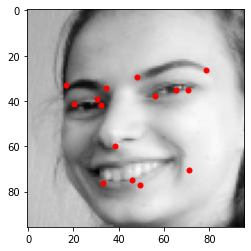

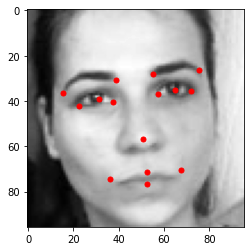

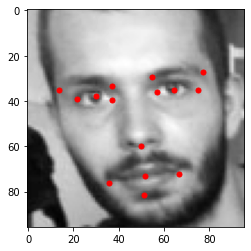

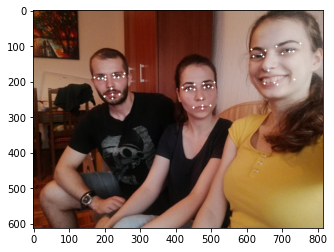

In [24]:
# Load haarcascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
dimensions = (96, 96)

# Enter the path to your test image
img = cv2.imread('test/many_faces.jpg')

default_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
#faces = face_cascade.detectMultiScale(gray_img, 4, 6)

faces_img = np.copy(gray_img)

#plt.rcParams["axes.grid"] = False


all_x_cords = []
all_y_cords = []

for i, (x,y,w,h) in enumerate(faces):
    just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
    #cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)
    
    scale_val_x = w/96
    scale_val_y = h/96
    
    label_point = detect_points(just_face)
    all_x_cords.append((label_point[::2]*scale_val_x)+x)
    all_y_cords.append((label_point[1::2]*scale_val_y)+y)
   
    plt.imshow(just_face, cmap='gray')
    plt.plot(label_point[::2], label_point[1::2], 'ro', markersize=5)
    plt.show()
    
    
plt.imshow(default_img)    
plt.plot(all_x_cords, all_y_cords, 'wo',  markersize=1)
plt.show()

In [2]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time
import copy

def detect_faces_in_video(input_filename, output_filename, model_location):
    model = load_model(model_location)

    def get_points_main(img):

        def detect_points(face_img):
            me  = np.array(face_img)/255
            x_test = np.expand_dims(me, axis=0)
            x_test = np.expand_dims(x_test, axis=3)

            y_test = model.predict(x_test)
            label_points = (np.squeeze(y_test)*48)+48


            return label_points

        # load haarcascade
        face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        dimensions = (96, 96)


        try:
            default_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            gray_img = cv2.cvtColor(default_img, cv2.COLOR_RGB2GRAY)
            faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)

        except:
            return []

        faces_img = np.copy(gray_img)


        plt.rcParams["axes.grid"] = False


        all_x_cords = []
        all_y_cords = []


        for i, (x,y,w,h) in enumerate(faces):
            try:
                just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
            except:
                return []
            cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)

            scale_val_x = w/96
            scale_val_y = h/96

            label_point = detect_points(just_face)

            all_x_cords.append((label_point[::2]*scale_val_x)+x)
            all_y_cords.append((label_point[1::2]*scale_val_y)+y)



        final_points_list = []
        try:
            for ii in range(len(all_x_cords)):
                for a_x, a_y in zip(all_x_cords[ii], all_y_cords[ii]):
                    final_points_list.append([a_x, a_y])
        except:
            return final_points_list

        return final_points_list


    cap = cv2.VideoCapture(input_filename)
    ret, frame = cap.read()
    height, width, channel = frame.shape

    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    out = cv2.VideoWriter(output_filename, fourcc, 20.0, (width, height))


    frame_no = 0
    while cap.isOpened():

        a = time.time()

        frame_no += 1
        ret, frame = cap.read()
        points = get_points_main(frame)

        try:
            overlay = frame.copy()
        except Exception as e:
            break

        for point in points:
            cv2.circle(frame, tuple(point), 3, (255, 255, 255), -1)

        opacity = 0.3
        cv2.addWeighted(overlay, opacity, frame, 1 - opacity, 0, frame)

        out.write(frame)
        b = time.time()


    cap.release()
    cv2.destroyAllWindows()

In [3]:
model_location = "save_model/model/model.hdf5"
input_file = 'test/video1.mp4'
output_filename = 'test/fake_videos.avi'  

detect_faces_in_video(input_file, output_filename, model_location)